# NLP Tutorial: Text Classification Using Spacy Word Embeddings

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Fake_Real_Data.csv')
print(df.shape)
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [4]:
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [5]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [6]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [7]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [10]:
x_train

array([array([-2.37034578e-02,  1.48199528e-01, -5.90629913e-02, -3.08816023e-02,
               7.27375224e-02, -3.08532882e-02, -3.06985099e-02, -1.34581909e-01,
              -2.89440658e-02,  2.11217093e+00, -2.11404130e-01, -1.30848298e-02,
               9.76289958e-02, -8.72511789e-02, -1.27175421e-01, -7.87014738e-02,
              -4.45573106e-02,  8.96639585e-01, -7.74146467e-02, -1.98509209e-02,
              -4.66989167e-03,  3.00393123e-02, -5.44604585e-02, -3.01919542e-02,
               2.35033669e-02,  4.78319898e-02, -1.07414149e-01, -4.99117828e-04,
               6.58109086e-03, -7.65082892e-03,  2.21302323e-02,  3.81453149e-02,
               2.45294645e-02,  8.50784853e-02,  4.57540490e-02, -2.83517223e-02,
              -2.62076780e-02,  9.25419573e-03, -4.42117751e-02, -1.07683197e-01,
               9.35755111e-03,  6.35481179e-02,  5.63387387e-02, -6.61794245e-02,
               1.34266177e-02,  1.39213279e-02, -8.35610852e-02, -3.96741964e-02,
               2

In [11]:
import numpy as np

In [12]:
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [13]:
x_train_2d

array([[-0.02370346,  0.14819953, -0.05906299, ..., -0.06582212,
        -0.05378761,  0.08668853],
       [-0.01595326,  0.15394837, -0.10800642, ..., -0.03003666,
        -0.04334445,  0.03076661],
       [-0.04449651,  0.11169833, -0.04756551, ..., -0.10499363,
        -0.00837316,  0.06351685],
       ...,
       [ 0.02167883,  0.12635042, -0.01003216, ..., -0.08063941,
        -0.06881595,  0.04882506],
       [-0.07091133,  0.08315557, -0.06580248, ..., -0.06301989,
         0.02095402,  0.09888683],
       [-0.08993341,  0.14425951, -0.14141384, ..., -0.03444797,
         0.02387965,  0.06281336]], shape=(7920, 300), dtype=float32)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [15]:
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(x_train_2d)
scaled_test_embed = scaler.transform(x_test_2d)

In [16]:
clf= MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [18]:
y_pred = clf.predict(scaled_test_embed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

clf.fit(x_train_2d, y_train)

y_pred = clf.predict(x_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(95.72222222222221, 0.5, 'Truth')

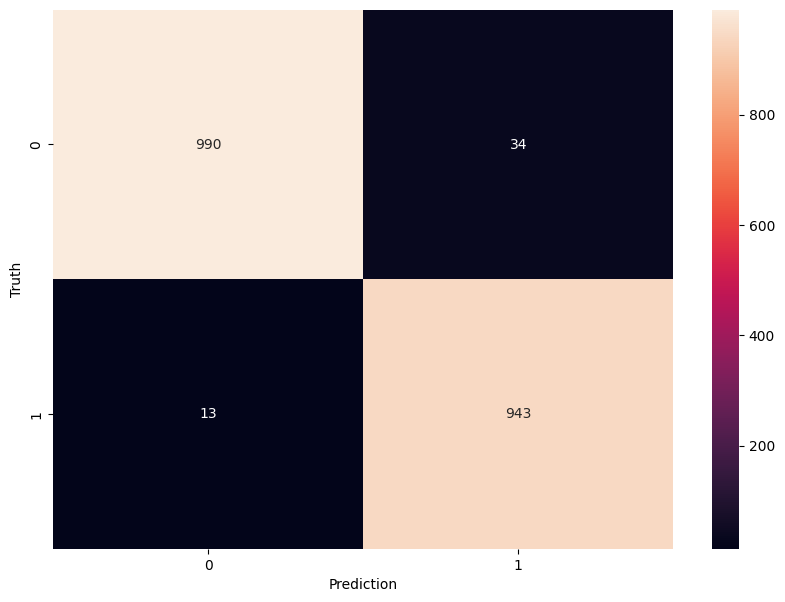

In [24]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')